In [122]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [159]:
ggndf=pd.read_csv('gurgaon_10k.csv')
koldf=pd.read_csv('kolkata.csv')
mumdf=pd.read_csv('mumbai.csv')
hyddf=pd.read_csv('hyderabad.csv')

/var/folders/4c/bxwj5rds7m37_c23zm69g2q40000gn/T/ipykernel_1613/4160088328.py:1: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  ggndf=pd.read_csv('gurgaon_10k.csv')


In [160]:
ggndf.head()
print(ggndf.shape)

(10704, 67)


In [161]:
# Array of parameters to drop
parameters_to_drop = ['FACING','MIN_AREA_SQFT', 'MIN_PRICE','TOTAL_LANDMARK_COUNT', 'BALCONY_NUM','CARPET_SQFT','SUPERBUILTUP_SQFT','BATHROOM_NUM','REGISTER_DATE','PROP_ID', 'PHOTO_URL', 'MEDIUM_PHOTO_URL','DESCRIPTION','CITY','metadata','BUILDING_ID','MAP_DETAILS','FSL_Data','FORMATTED','FEATURES','AMENITIES','PD_URL','EXPIRY_DATE','PROP_HEADING','PROP_DETAILS_URL','CLASS_HEADING','CLASS_LABEL','SECONDARY_TAGS','PROPERTY_IMAGES','THUMBNAIL_IMAGES','FORMATTED_LANDMARK_DETAILS','CONTACT_NAME','DEALER_PHOTO_URL','BUILDING_NAME','CITY_ID','profile','xid','metadata','location','BUILTUP_SQFT','SUPER_SQFT','COMMON_FURNISHING_ATTRIBUTES','QUALITY_SCORE','FURNISHING_ATTRIBUTES']

# Drop the parameters from the DataFrame ggndf
ggndf.drop(parameters_to_drop, axis=1, inplace=True)


In [162]:
ggndf.shape

(10704, 24)

In [163]:
# Assuming df is your DataFrame and 'COLUMN_NAME' is the column you want to typecast
# First, drop rows with NaN or missing values in the column
ggndf = ggndf.dropna(subset=['FURNISH'])

# Now, typecast the cleaned column to int
ggndf['FURNISH'] = ggndf['FURNISH'].astype('float')

# Now the 'COLUMN_NAME' column should be of type int, with rows containing NaN or missing values removed


In [164]:
for col in ggndf.columns:
    print(ggndf[col].dtype)

object
object
object
float64
int64
float64
float64
float64
int64
object
float64
object
int64
float64
object
float64
float64
object
object
object
object
object
object
object


In [149]:
ggndf.describe()

,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,AGE,TOTAL_FLOOR,MAX_PRICE,PRICE_SQFT,BROKERAGE,MAX_AREA_SQFT
count,10152.000000,10704.000000,10511.000000,1.070400e+04,10704.000000,10704.000000,10697.000000,1.070400e+04,1.070400e+04,1.062300e+04,10704.000000
mean,1.001182,0.968610,3.327181,4.919281e+04,3.298954,3.228886,14.787137,3.184388e+07,4.919281e+04,4.915147e+04,330.142935
std,0.034362,0.304357,1.288234,9.227134e+05,1.231244,2.154224,11.353743,5.168949e+07,9.227134e+05,7.898489e+05,7191.202775
min,1.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.787090
25%,1.000000,1.000000,3.000000,8.371500e+03,2.000000,1.000000,4.000000,1.389275e+07,8.371500e+03,1.000000e+00,145.857710
50%,1.000000,1.000000,3.000000,1.191750e+04,4.000000,2.000000,14.000000,2.200000e+07,1.191750e+04,1.000000e+00,192.495016
75%,1.000000,1.000000,4.000000,1.771950e+04,4.000000,6.000000,22.000000,3.700000e+07,1.771950e+04,1.000000e+00,252.603257
max,2.000000,4.000000,22.000000,8.500000e+07,4.000000,6.000000,51.000000,2.147484e+09,8.500000e+07,7.310000e+07,728433.842400


In [150]:
import pandas as pd

# Assuming df is your DataFrame
# Calculate mean and standard deviation
mean = ggndf['PRICE_PER_UNIT_AREA	'].mean()
std_dev = ggndf['PRICE_PER_UNIT_AREA	'].std()

# Define the threshold (e.g., ±3 standard deviations)
threshold = 3

# Identify outliers
outliers = ggndf[(ggndf['PRICE_PER_UNIT_AREA	'] < mean - threshold * std_dev) | (ggndf['PRICE_PER_UNIT_AREA	'] > mean + threshold * std_dev)]

# Remove outliers
df_cleaned = ggndf[~ggndf.index.isin(outliers.index)]

# Now df_cleaned contains the dataset with outliers removed


KeyError: 'PRICE_PER_UNIT_AREA\t'

In [145]:
# Filter out columns of type int or float
numeric_columns = ggndf.select_dtypes(include=['int', 'float'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot (Numeric Columns)')
plt.xlabel('Features')
plt.ylabel('Features')
plt.savefig('correlation_plot_numeric.png')  # Save the plot
plt.show()


ValueError: could not convert string to float: 'S'

In [81]:
# Array of parameters to drop
parameters_to_drop = ['MIN_AREA_SQFT', 'MIN_PRICE']
# Drop the parameters from the DataFrame ggndf
ggndf.drop(parameters_to_drop, axis=1, inplace=True)

In [82]:
# Assuming you want to rename the column 'old_column_name' to 'new_column_name'
ggndf.rename(columns={'MAX_AREA_SQFT': 'AREA_SQFT'}, inplace=True)
ggndf.rename(columns={'MAX_PRICE': 'PRICE'}, inplace=True)



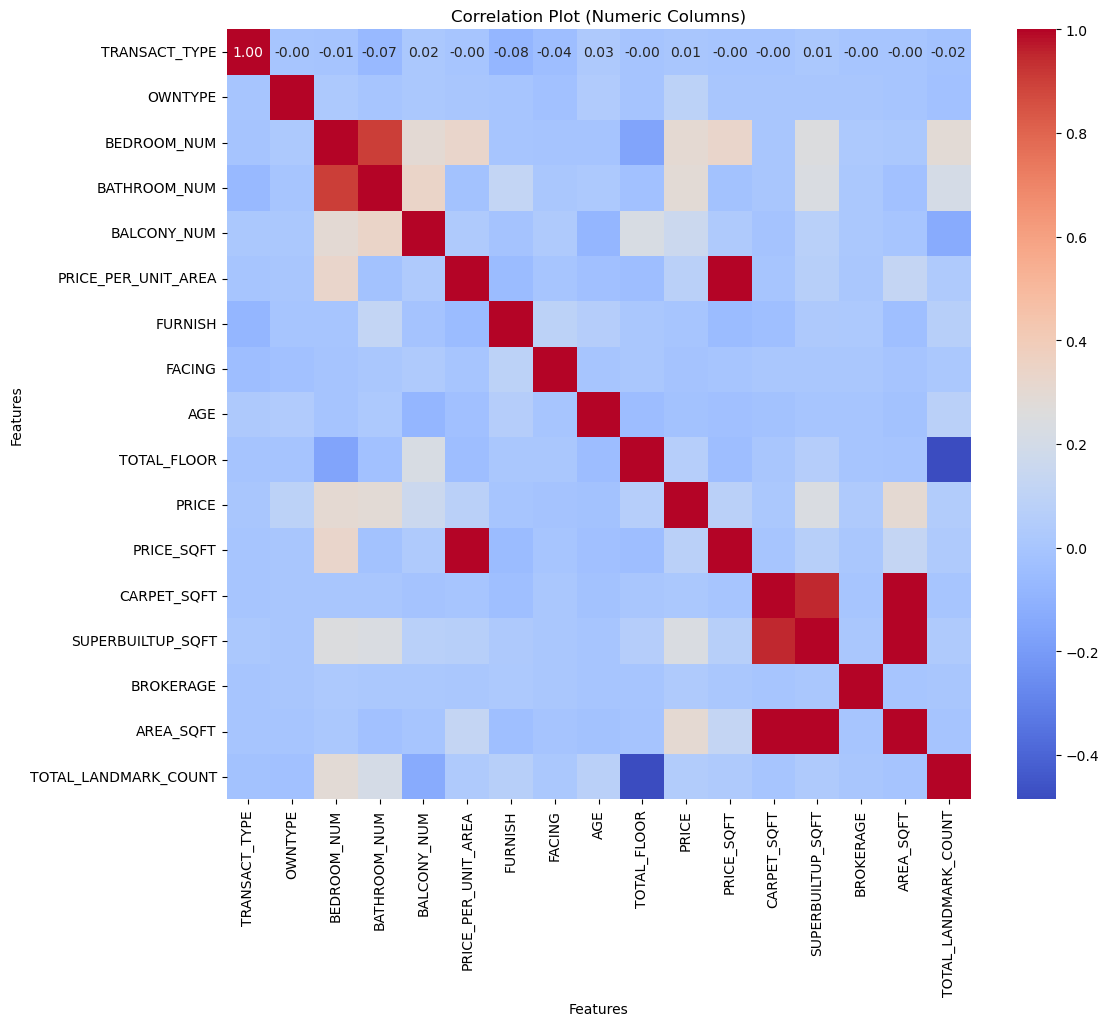

In [83]:
# Filter out columns of type int or float
numeric_columns = ggndf.select_dtypes(include=['int', 'float'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot (Numeric Columns)')
plt.xlabel('Features')
plt.ylabel('Features')
plt.savefig('correlation_plot_numeric.png')  # Save the plot
plt.show()


In [84]:
ggndf.isna().sum()

PREFERENCE                 0
PROPERTY_TYPE              0
LOCALITY                   0
TRANSACT_TYPE            552
OWNTYPE                    0
BEDROOM_NUM              193
BATHROOM_NUM               0
BALCONY_NUM              203
PRICE_PER_UNIT_AREA        0
FURNISH                    0
FACING                     0
AGE                        0
FLOOR_NUM                900
TOTAL_FLOOR                7
PROP_NAME               1569
PRICE                      0
PRICE_SQFT                 0
LISTING                    0
CARPET_SQFT             4165
SUPERBUILTUP_SQFT       3992
BROKERAGE                 81
AREA_SQFT                  0
TOP_USPS                2525
GROUP_NAME                 0
AREA                       0
PRICE                      0
TOTAL_LANDMARK_COUNT      66
CONTACT_COMPANY_NAME       5
SOCIETY_NAME            1569
LOCALITY_WO_CITY           0
dtype: int64

In [114]:
# Array of parameters to drop
parameters_to_drop = ['TOTAL_LANDMARK_COUNT', 'BALCONY_NUM','CARPET_SQFT','SUPERBUILTUP_SQFT']
# Drop the parameters from the DataFrame ggndf
ggndf.drop(parameters_to_drop, axis=1, inplace=True)


In [112]:
ggndf = ggndf.dropna(subset=[''])

In [115]:
ggndf.isna().sum()

PREFERENCE              0
PROPERTY_TYPE           0
LOCALITY                0
OWNTYPE                 0
BEDROOM_NUM             0
BATHROOM_NUM            0
PRICE_PER_UNIT_AREA     0
FURNISH                 0
FACING                  0
AGE                     0
FLOOR_NUM               0
TOTAL_FLOOR             0
PROP_NAME               0
PRICE                   0
PRICE_SQFT              0
LISTING                 0
BROKERAGE               0
AREA_SQFT               0
TOP_USPS                0
GROUP_NAME              0
AREA                    0
PRICE                   0
CONTACT_COMPANY_NAME    0
SOCIETY_NAME            0
LOCALITY_WO_CITY        0
dtype: int64

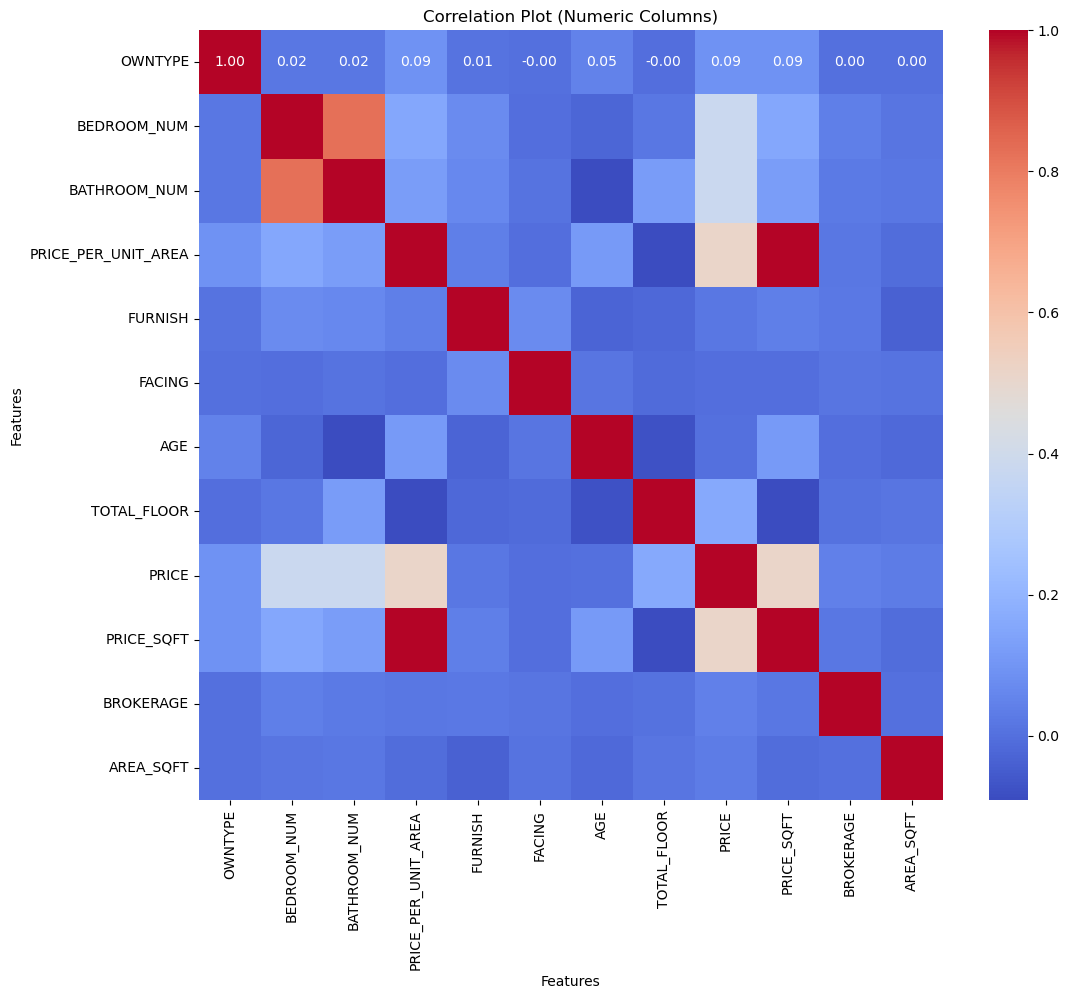

In [116]:
# Filter out columns of type int or float
numeric_columns = ggndf.select_dtypes(include=['int', 'float'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot (Numeric Columns)')
plt.xlabel('Features')
plt.ylabel('Features')
plt.savefig('correlation_plot_numeric.png')  # Save the plot
plt.show()

In [117]:
ggndf.describe()

,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,FACING,AGE,TOTAL_FLOOR,PRICE,PRICE_SQFT,BROKERAGE,AREA_SQFT
count,6608.000000,6608.000000,6608.000000,6.608000e+03,6608.000000,6608.000000,6608.000000,6608.000000,6.608000e+03,6.608000e+03,6.608000e+03,6608.000000
mean,0.973668,3.128178,3.376362,1.554320e+04,3.352754,3.486077,3.233505,17.665557,2.957955e+07,1.554320e+04,5.283149e+04,256.874278
std,0.271612,0.769916,1.080181,2.425686e+04,1.136827,1.976505,2.095448,11.115673,4.887172e+07,2.425686e+04,9.643060e+05,1436.939668
min,0.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,18.580600
25%,1.000000,3.000000,3.000000,8.077500e+03,2.000000,2.000000,1.000000,8.000000,1.350000e+07,8.077500e+03,1.000000e+00,145.277066
50%,1.000000,3.000000,3.000000,1.109200e+04,4.000000,3.000000,2.000000,17.000000,2.000000e+07,1.109200e+04,1.000000e+00,186.084709
75%,1.000000,4.000000,4.000000,1.515100e+04,4.000000,5.000000,5.000000,25.000000,3.450000e+07,1.515100e+04,1.000000e+00,250.001973
max,4.000000,10.000000,11.000000,1.190476e+06,4.000000,8.000000,6.000000,51.000000,2.147484e+09,1.190476e+06,7.310000e+07,53692.917238


In [118]:
column_to_convert = 'PRICE'

# Attempt to convert elements in the specified column to int
# If conversion fails, those rows will contain NaN
ggndf[column_to_convert] = pd.to_numeric(ggndf[column_to_convert], errors='coerce')

# Drop rows containing NaN values
ggndf.dropna(subset=[column_to_convert], inplace=True)

print(ggndf)


TypeError: arg must be a list, tuple, 1-d array, or Series

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'PRICE' is the attribute you want to plot against all others
attribute_name = 'PRICE'

# Convert 'PRICE' column to numerical type
ggndf['PRICE'] = pd.to_numeric(ggndf['PRICE'], errors='coerce')

# Separate numerical and categorical columns
numeric_attributes = [col for col in ggndf.columns if ggndf[col].dtype in ['int64', 'float64']]
categorical_attributes = [col for col in ggndf.columns if ggndf[col].dtype == 'object']

# Plot numerical attributes as bar graphs
for numeric_attr in numeric_attributes:
    # Filter rows with missing values in the numeric attribute
    filtered_df = ggndf.dropna(subset=[numeric_attr])
    
    plt.figure(figsize=(10, 6))
    plt.bar(filtered_df[attribute_name], filtered_df[numeric_attr])
    plt.xlabel(attribute_name)
    plt.ylabel(numeric_attr)
    plt.title(f'{numeric_attr} vs {attribute_name}')
    plt.xticks(rotation=45)
    plt.show()

# Plot categorical attributes as bar graphs
for categorical_attr in categorical_attributes:
    # Filter rows with missing values in the categorical attribute
    filtered_df = ggndf.dropna(subset=[categorical_attr])
    
    plt.figure(figsize=(10, 6))
    filtered_df[categorical_attr].value_counts().plot(kind='bar')
    plt.xlabel(categorical_attr)
    plt.ylabel('Count')
    plt.title(f'{categorical_attr} Distribution')
    plt.xticks(rotation=45)
    plt.show()


TypeError: arg must be a list, tuple, 1-d array, or Series

In [91]:
ggndf.dtypes

PREFERENCE               object
PROPERTY_TYPE            object
LOCALITY                 object
OWNTYPE                   int64
BEDROOM_NUM             float64
BATHROOM_NUM              int64
PRICE_PER_UNIT_AREA     float64
FURNISH                   int64
FACING                    int64
AGE                       int64
FLOOR_NUM                object
TOTAL_FLOOR             float64
PROP_NAME                object
PRICE                     int64
PRICE_SQFT              float64
LISTING                  object
BROKERAGE               float64
AREA_SQFT               float64
TOP_USPS                 object
GROUP_NAME               object
AREA                     object
PRICE                    object
TOTAL_LANDMARK_COUNT    float64
CONTACT_COMPANY_NAME     object
SOCIETY_NAME             object
LOCALITY_WO_CITY         object
dtype: object

In [ ]:
for col in ggndf.columns:
    print(ggndf[col].dtype)

object
object
object
int64
float64
int64
float64
int64
int64
int64
object
float64
object


AttributeError: 'DataFrame' object has no attribute 'dtype'

In [121]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# Assuming df is your DataFrame
# First, drop any non-numeric columns that are not needed for modeling
df_numeric = ggndf.select_dtypes(include=['float64', 'int64'])

# Normalize the numeric columns using Min-Max scaling
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Split the features and target variable
X = df_normalized.drop(columns=['PRICE'])
y = df_normalized['PRICE']

# Create a multiple linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Print the coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)


                Feature  Coefficient
0               OWNTYPE     0.013971
1           BEDROOM_NUM     0.050245
2          BATHROOM_NUM     0.028813
3   PRICE_PER_UNIT_AREA     0.269935
4               FURNISH    -0.001441
5                FACING     0.000201
6                   AGE    -0.001779
7           TOTAL_FLOOR     0.018855
8            PRICE_SQFT     0.269935
9             BROKERAGE     0.038070
10            AREA_SQFT     0.021193
